# ETL

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
# Leitura do nosso arquivo csv

df = pd.read_csv("titanic.csv")

In [242]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [243]:
# Quantidades de linhas e colunas
df.shape

(891, 12)

In [244]:
# Backup
df_backup = df.copy()

In [245]:
# Contas dados nulos em cada coluna
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [246]:
# Contar dados nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [247]:
# Descrição dos dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [248]:
# Verificar as infomações
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [249]:
# Remover linhas duplicadas
df = df.drop_duplicates()

In [250]:
# Remover linhas duplicadas de uma coluna específica
df = df.drop_duplicates(["PassengerId"])

In [251]:
# Função das linhas duplicadas (apenas explicação)
def visulizar_linhas_duplicadas(df):
  duplicados = df[df.duplicated(keep=False)] # colocar o keep para trazer apenas as duplicadas, o padrão ele traz as linhas que NÃO são duplicadas
  return duplicados

linhas_duplicadas = visulizar_linhas_duplicadas(df)
print(linhas_duplicadas)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [252]:
# Apagar colunas do df
df = df.drop(columns=["SibSp","Parch"])

In [253]:
# Apagar as informações NAN (na são os valores nulos), utilizar em uma df teste para não afetar a original
df_teste = df.dropna(subset=["Cabin"])

In [254]:
df_teste.shape

(204, 10)

In [255]:
# Resetar o index (para apagar o número de índice caso tenha)
df = df.reset_index(drop=True)

In [256]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [257]:
# Renomear as colunas
df.rename(columns={
  'PassengerId': 'IdPassageiro', 
  'Survived': 'Sobreviveu', 
  'Pclass': 'Classe', 
  'Name': 'Nome', 
  'Sex': 'Genero', 
  'Age': 'Idade', 
  'Ticket': 'Bilhete',       
  'Fare': 'Tarifa', 
  'Cabin': 'Cabine', 
  'Embarked': 'Embarque',
}, inplace=True)

In [258]:
df.columns

Index(['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Genero', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [259]:
# Salvar no csv
df.to_csv('titanic_tratado.csv', index=False)

# Análises

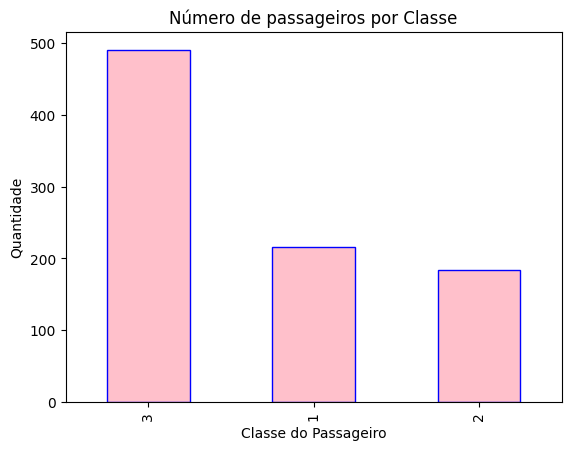

In [260]:
# Quantos passageiros estavam em casa classe do Titanic?

# Contagem do número de passageiros
contagem_passageiros = df["Classe"].value_counts()

# Criação do gráfico
contagem_passageiros.plot(kind="bar", edgecolor="blue", color="pink")

# Configurações
plt.xlabel("Classe do Passageiro")
plt.ylabel("Quantidade")
plt.title("Número de passageiros por Classe")

plt.show()

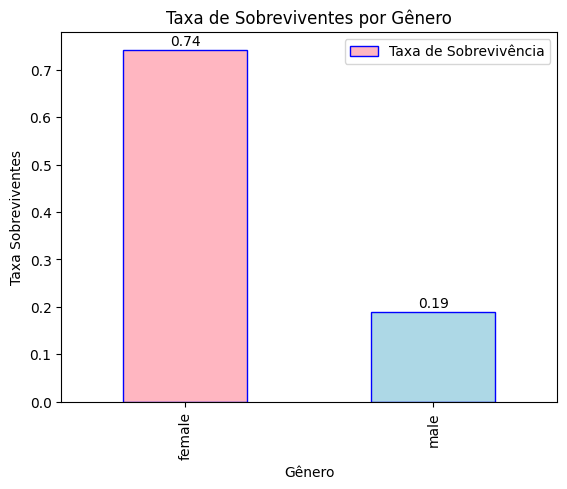

In [261]:
# Qual é a taxa de sobreviventes por gênero?

# Agrupamento de gênero por sobreviventes
taxa_sob_genero = df.groupby("Genero")["Sobreviveu"].mean()

# Cores para barras
cores = ["lightpink", "lightblue"]

# Plotagem
barras = taxa_sob_genero.plot.bar(edgecolor = "blue", color= cores)

# Os rótulos
plt.xlabel("Gênero")
plt.ylabel("Taxa Sobreviventes")
plt.title("Taxa de Sobreviventes por Gênero")

# Adicionar Legendas
plt.legend(["Taxa de Sobrevivência"])

# Adicionar rótulos nos gráficos
for i, v in enumerate(taxa_sob_genero):
  barras.text(i, v + 0.01, f"{v:.2f}", color = "black", ha = "center")

plt.show()

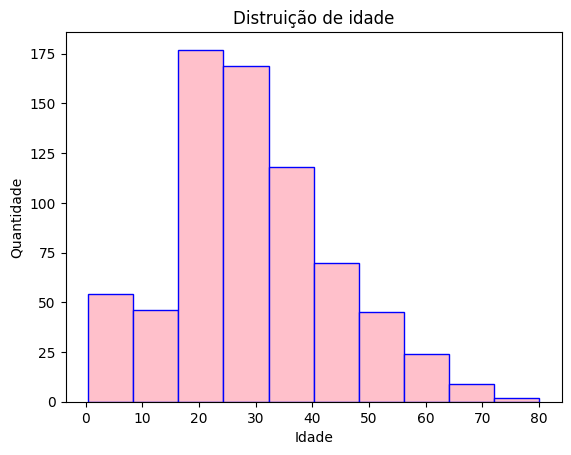

In [262]:
# Distribuição de idades

# Plotagem
df["Idade"].plot.hist(bins=10, edgecolor="blue", color="pink")

plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distruição de idade")

plt.show()

# Teste Hipóteses 

Teste de Classe e Sobrevivência

Hipótese Nula H0: Os sobreviventes não dependem da idade dos passageiros.<p>
Hipótese Alternativa h1: Sobreviventes dependem da idade dos passageiros.

In [263]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [264]:
from scipy.stats import ttest_ind
import seaborn as sns

Teste T de idade
Estatísticaa T: -2.06668694625381
Valor P: 0.03912465401348249
Rejeitamos a hipótese nula


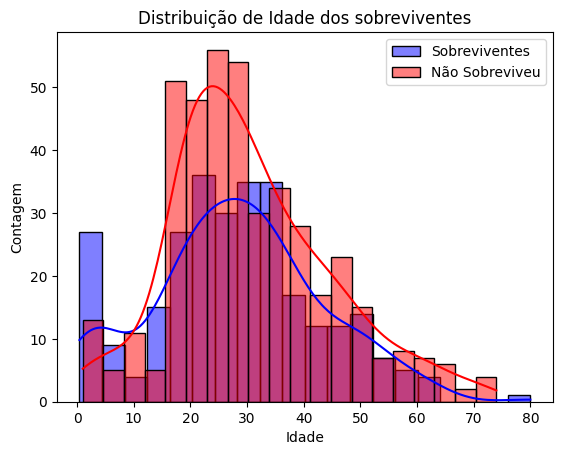

In [267]:
# Amostras
idade_sobreviventes = df[df['Sobreviveu']== 1]["Idade"].dropna()
idade_nao_sobreviveu = df[df['Sobreviveu']== 0]["Idade"].dropna()

# Teste t
estatistica_t, valor_p = ttest_ind(idade_sobreviventes, idade_nao_sobreviveu)

print("Teste T de idade")
print(f"Estatísticaa T: {estatistica_t}")
print(f"Valor P: {valor_p}")

# Gráfico
sns.histplot(idade_sobreviventes, color= 'blue', label='Sobreviventes', kde=True, bins= 20)
sns.histplot(idade_nao_sobreviveu, color= 'red', label='Não Sobreviveu', kde=True, bins= 20)

# Rótulos
plt.legend()
plt.title("Distribuição de Idade dos sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show

# Interpretação
if valor_p < 0.05:
  print("Rejeitamos a hipótese nula")
else: 
  print("Não rejeitamos a hipótese nula")

# Amostra e SQL

In [268]:
# Amostra
baby_df = df.sample(100)

In [269]:
baby_df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,19950,263.0,C23 C25 C27,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,347088,27.9,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,2003,26.0,NaN,S
